# **Description**
---

1. Suppose we have 1 M USD and want to invest in US stock market for 12 years (2012-2024). We will decide the portfolio every three months and buy hold for three months.  

  - At the beginning of every three months: Use the past six months of data to compute correlations of S&P 500 stocks based on stock returns.

  - Select stocks for the portfolio as follows:
    - Choose the first stock with the smallest average of the absolute values of correlations with all other stocks (based on returns).

    - Choose the second stock with the smallest absolute correlation with the first selected stock's return.
    - Choose the third stock with the smallest average of absolute correlations with the returns of the first two selected stocks.
  -  Repeat this process until we have selected a total of 10 stocks.
  
  - Invest an equal amount in each of these 10 stocks, and hold them for three months.
    
  - Repeat this selection and investment process every three months over the 12-year period.


2. We calculate the maximum drawdown and annual Sharpe ratio of our investment over these 12 years.  

  - Track the total wealth of our portfolio daily, and use this wealth process to determine the maximum drawdown and daily Sharpe ratio. Then, convert the daily Sharpe ratio to an annual Sharpe ratio.


3. Conclusion and results comparison with market index ETFs: QQQ and SPY.

4. Further Strategy analysis

A place to share and store our code.


https://docs.google.com/document/d/1RyAavOpPLeXK95ag0hyoUD-47i3UcIJYSJd6b6iSZMs/edit?usp=sharing



# **KUSNADI, Vicko Nicholas 21022506**




# 1. Install Dependencies

In [ ]:
# @title !pip Install
!pip install --quiet --upgrade rmbi3110
!pip install --quiet --upgrade dcor
!pip install yfinance

In [ ]:
# @title Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')
pd.options.plotting.backend = "plotly"
import yfinance as yf
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
#import numpy as np
#import rmbi3110
#import dcor

# 2. Main Code

In [ ]:
# @title sp_500_list
adf = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
# Extract "Company Name" Data
sp_500_list = adf['Symbol'].tolist()
sp_500_list
# Create List + change the naming connversion since wikipedia and yahoo finance have different naming conversion
index=sp_500_list.index("BRK.B")
sp_500_list[index]="BRK-B"
index=sp_500_list.index("BF.B")
sp_500_list[index]="BF-B"

len(sp_500_list)

503

#### Extracting dates and store all the dates in Return_DataFrame

In [ ]:
# @title All_Stock_List pt 1
kkk=yf.Ticker("SPY").history(start="2011-07-01", end="2025-1-31")
Return_DataFrame = pd.DataFrame(index=kkk.index.tolist())

# Loop through all S&P500 stocks and put it on All_Stock_List
# All_Stock_List is a dataframe contains of {Stocks Name} with its {time_list_}
All_Stock_List = pd.DataFrame()

for i, stock in enumerate(sp_500_list):
  try:
    time_list_ = yf.Ticker(stock).history(start="2011-07-01", end="2025-1-31").fillna(0)
    time_list_["Tomorrow_open"] = time_list_['Open'].shift(-1)
    time_list_["Stock"] = stock
    time_list_["Tomorrow_open"].fillna(0, inplace = True)
    time_list_.loc[time_list_.index[-1], "Tomorrow_open"] = time_list_.loc[time_list_.index[-1], "Close"]
    time_list_["return"] = (time_list_["Tomorrow_open"]/time_list_["Open"])-1
    All_Stock_List = pd.concat([All_Stock_List, time_list_])
  except:
    print(f"No data available for {stock}, skipping.")
    pass
All_Stock_List

ERROR:yfinance:$ETR: possibly delisted; no price data found  (1d 2011-07-01 -> 2025-1-31)


No data available for ETR, skipping.


Open        High         Low       Close  \
Date                                                                        
2011-07-01 00:00:00-04:00   51.653118   52.807865   51.653118   52.655350   
2011-07-05 00:00:00-04:00   52.508270   52.758831   52.323076   52.366650   
2011-07-06 00:00:00-04:00   52.355780   53.107455   52.344890   52.965839   
2011-07-07 00:00:00-04:00   53.232720   53.483276   52.927690   53.363445   
2011-07-08 00:00:00-04:00   52.900460   53.200042   52.829655   53.172806   
...                               ...         ...         ...         ...   
2025-01-24 00:00:00-05:00  166.059998  169.080002  165.949997  168.610001   
2025-01-27 00:00:00-05:00  168.320007  173.479996  168.320007  173.029999   
2025-01-28 00:00:00-05:00  173.250000  174.929993  169.460007  170.419998   
2025-01-29 00:00:00-05:00  169.699997  171.190002  169.000000  170.220001   
2025-01-30 00:00:00-05:00  171.639999  174.080002  171.360001  172.710007   

                            Volume  Dividends  Stock Splits  Tomorrow_open  \
Date                                                                         
2011-07-01 00:00:00-04:00  5573001        0.0           0.0      52.508270   
2011-07-05 00:00:00-04:00  3664783        0.0           0.0      52.355780   
2011-07-06 00:00:00-04:00  4430104        0.0           0.0      53.232720   
2011-07-07 00:00:00-04:00  3961272        0.0           0.0      52.900460   
2011-07-08 00:00:00-04:00  3605820        0.0           0.0      52.535524   
...                            ...        ...           ...            ...   
2025-01-24 00:00:00-05:00  2465600        0.0           0.0     168.320007   
2025-01-27 00:00:00-05:00  2404500        0.0           0.0     173.250000   
2025-01-28 00:00:00-05:00  2164600        0.0           0.0     169.699997   
2025-01-29 00:00:00-05:00  2144200        0.0           0.0     171.639999   
2025-01-30 00:00:00-05:00  1785600        0.0           0.0     172.710007   

                          Stock    return  
Date                                       
2011-07-01 00:00:00-04:00   MMM  0.016556  
2011-07-05 00:00:00-04:00   MMM -0.002904  
2011-07-06 00:00:00-04:00   MMM  0.016750  
2011-07-07 00:00:00-04:00   MMM -0.006242  
2011-07-08 00:00:00-04:00   MMM -0.006899  
...                         ...       ...  
2025-01-24 00:00:00-05:00   ZTS  0.013610  
2025-01-27 00:00:00-05:00   ZTS  0.029289  
2025-01-28 00:00:00-05:00   ZTS -0.020491  
2025-01-29 00:00:00-05:00   ZTS  0.011432  
2025-01-30 00:00:00-05:00   ZTS  0.006234  

[1637889 rows x 10 columns]

In [ ]:
# @title All_Stock_List pt 2
columns = All_Stock_List.columns.tolist()
columns.insert(0, columns.pop(columns.index("Stock")))
All_Stock_List = All_Stock_List[columns]
x = 120
# All_Stock_List[x:x+15]
All_Stock_List

Stock        Open        High         Low  \
Date                                                                  
2011-07-01 00:00:00-04:00   MMM   51.653118   52.807865   51.653118   
2011-07-05 00:00:00-04:00   MMM   52.508270   52.758831   52.323076   
2011-07-06 00:00:00-04:00   MMM   52.355780   53.107455   52.344890   
2011-07-07 00:00:00-04:00   MMM   53.232720   53.483276   52.927690   
2011-07-08 00:00:00-04:00   MMM   52.900460   53.200042   52.829655   
...                         ...         ...         ...         ...   
2025-01-24 00:00:00-05:00   ZTS  166.059998  169.080002  165.949997   
2025-01-27 00:00:00-05:00   ZTS  168.320007  173.479996  168.320007   
2025-01-28 00:00:00-05:00   ZTS  173.250000  174.929993  169.460007   
2025-01-29 00:00:00-05:00   ZTS  169.699997  171.190002  169.000000   
2025-01-30 00:00:00-05:00   ZTS  171.639999  174.080002  171.360001   

                                Close   Volume  Dividends  Stock Splits  \
Date                                                                      
2011-07-01 00:00:00-04:00   52.655350  5573001        0.0           0.0   
2011-07-05 00:00:00-04:00   52.366650  3664783        0.0           0.0   
2011-07-06 00:00:00-04:00   52.965839  4430104        0.0           0.0   
2011-07-07 00:00:00-04:00   53.363445  3961272        0.0           0.0   
2011-07-08 00:00:00-04:00   53.172806  3605820        0.0           0.0   
...                               ...      ...        ...           ...   
2025-01-24 00:00:00-05:00  168.610001  2465600        0.0           0.0   
2025-01-27 00:00:00-05:00  173.029999  2404500        0.0           0.0   
2025-01-28 00:00:00-05:00  170.419998  2164600        0.0           0.0   
2025-01-29 00:00:00-05:00  170.220001  2144200        0.0           0.0   
2025-01-30 00:00:00-05:00  172.710007  1785600        0.0           0.0   

                           Tomorrow_open    return  
Date                                                
2011-07-01 00:00:00-04:00      52.508270  0.016556  
2011-07-05 00:00:00-04:00      52.355780 -0.002904  
2011-07-06 00:00:00-04:00      53.232720  0.016750  
2011-07-07 00:00:00-04:00      52.900460 -0.006242  
2011-07-08 00:00:00-04:00      52.535524 -0.006899  
...                                  ...       ...  
2025-01-24 00:00:00-05:00     168.320007  0.013610  
2025-01-27 00:00:00-05:00     173.250000  0.029289  
2025-01-28 00:00:00-05:00     169.699997 -0.020491  
2025-01-29 00:00:00-05:00     171.639999  0.011432  
2025-01-30 00:00:00-05:00     172.710007  0.006234  

[1637889 rows x 10 columns]

In [ ]:
# @title Return_DataFrame
Return_DataFrame = All_Stock_List.reset_index().pivot(index='Date', columns='Stock', values='return')
# Return_DataFrame = Return_DataFrame.fillna(0)
Return_DataFrame

Stock                             A      AAPL      ABBV      ABNB       ABT  \
Date                                                                          
2011-07-01 00:00:00-04:00  0.013664  0.020985       NaN       NaN  0.010466   
2011-07-05 00:00:00-04:00 -0.008088  0.017347       NaN       NaN  0.003202   
2011-07-06 00:00:00-04:00  0.017861  0.016392       NaN       NaN  0.004130   
2011-07-07 00:00:00-04:00 -0.026321 -0.003750       NaN       NaN -0.004487   
2011-07-08 00:00:00-04:00 -0.031342  0.008491       NaN       NaN -0.005821   
...                             ...       ...       ...       ...       ...   
2025-01-24 00:00:00-05:00 -0.003550 -0.003381  0.019726 -0.050298  0.033771   
2025-01-27 00:00:00-05:00  0.006928  0.030488  0.023978  0.021677  0.023830   
2025-01-28 00:00:00-05:00 -0.023721  0.014165 -0.013009  0.021373 -0.012254   
2025-01-29 00:00:00-05:00 -0.000269  0.019434  0.008653  0.016284 -0.001327   
2025-01-30 00:00:00-05:00  0.016314 -0.004525 -0.002045 -0.013253  0.006407   

Stock                          ACGL       ACN      ADBE       ADI       ADM  \
Date                                                                          
2011-07-01 00:00:00-04:00  0.017166  0.006645  0.002873  0.019949  0.014788   
2011-07-05 00:00:00-04:00 -0.006750  0.012379  0.003183 -0.010782  0.000972   
2011-07-06 00:00:00-04:00  0.013284  0.022008  0.010470  0.012167  0.006794   
2011-07-07 00:00:00-04:00 -0.002134  0.002712 -0.001570 -0.008264 -0.021530   
2011-07-08 00:00:00-04:00  0.000917 -0.011613 -0.019497 -0.010606  0.010509   
...                             ...       ...       ...       ...       ...   
2025-01-24 00:00:00-05:00  0.003334 -0.007787 -0.016122 -0.032143  0.015406   
2025-01-27 00:00:00-05:00  0.031304  0.035289  0.014039 -0.021113  0.012838   
2025-01-28 00:00:00-05:00 -0.014137  0.021156  0.008366 -0.015366 -0.031112   
2025-01-29 00:00:00-05:00 -0.004956 -0.004923 -0.000568  0.003293  0.027552   
2025-01-30 00:00:00-05:00  0.002225  0.007275  0.014397  0.010322 -0.003279   

Stock                      ...       WTW        WY      WYNN       XEL  \
Date                       ...                                           
2011-07-01 00:00:00-04:00  ...  0.006117  0.016506  0.037019  0.015214   
2011-07-05 00:00:00-04:00  ... -0.001459 -0.007217  0.007473 -0.006480   
2011-07-06 00:00:00-04:00  ...  0.014126  0.018173  0.027485  0.008968   
2011-07-07 00:00:00-04:00  ... -0.005764 -0.007139  0.001934 -0.012121   
2011-07-08 00:00:00-04:00  ... -0.002415 -0.019776  0.023996 -0.007362   
...                        ...       ...       ...       ...       ...   
2025-01-24 00:00:00-05:00  ...  0.013388  0.014047 -0.007410  0.007256   
2025-01-27 00:00:00-05:00  ...  0.016853  0.007916  0.001067  0.018460   
2025-01-28 00:00:00-05:00  ... -0.014995  0.003599  0.003551 -0.022988   
2025-01-29 00:00:00-05:00  ...  0.003113  0.008477  0.027955  0.006486   
2025-01-30 00:00:00-05:00  ...  0.013271  0.000970  0.028112  0.001948   

Stock                           XOM       XYL       YUM       ZBH      ZBRA  \
Date                                                                          
2011-07-01 00:00:00-04:00  0.001354       NaN  0.030385  0.030650  0.015632   
2011-07-05 00:00:00-04:00  0.001230       NaN -0.012814 -0.006163 -0.006530   
2011-07-06 00:00:00-04:00  0.010688       NaN -0.024182  0.007287  0.018075   
2011-07-07 00:00:00-04:00 -0.008387       NaN  0.004920  0.002617 -0.016601   
2011-07-08 00:00:00-04:00 -0.003432       NaN  0.000725 -0.023334  0.002814   
...                             ...       ...       ...       ...       ...   
2025-01-24 00:00:00-05:00 -0.011157 -0.010100  0.016568  0.009665 -0.034434   
2025-01-27 00:00:00-05:00  0.012843  0.011282  0.011331  0.010914 -0.011443   
2025-01-28 00:00:00-05:00 -0.024454 -0.006234 -0.003990 -0.008761  0.011400   
2025-01-29 00:00:00-05:00  0.014205  0.008089 -0.003236 -0.002589 -0.009195   
2025-01-30 00:00:00-05:00  0.0030

# =========Operations ===========

In [ ]:
# @title Variable and data structure Initialization
# original investment
investment_capital = 1000000

# balance_list for storing all the balance and later return
balance_list = [1000000,]

# date_list to store the whole date of investment in a list
date_list = ["2012-01-01",]

# initial balance
balance_df = 0

# investment_capital_per_stock contain investement_capital divided by 10
investment_capital_per_stock = []

for n in range(10):
  investment_capital_per_stock.append(investment_capital / 10)
investment_capital_per_stock

[100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0]

In [ ]:
# @title correlation and stock selection
# original investment
start_year=2011
start_month=4
end_year=2011
end_month=9
invest_start_month=10
invest_end_month=12


selected_stocks = []
selected_stocks_infinite = []
  # store stocks for investment (480 stocks in total)



for trial in range(48):
  # ==================Dates=======================
  # Algorithm to pick the dates for each period
  # 1 period = 3 month
  start_year=2011
  start_year=start_year+(trial+2)//4
  if (trial+2)%4==0:
    start_month=start_month-9
  else:
    start_month=start_month+3
  end_year=2011
  end_year=end_year+(trial+3)//4
  if (trial+3)%4==0:
    end_month=end_month-9
  else:
    end_month=end_month+3
  invest_start_year = 2012
  invest_start_year = invest_start_year+(trial)//4
  if (trial)%4==0:
    invest_start_month = invest_start_month-9
  else:
    invest_start_month =invest_start_month+3
  invest_end_year = 2012
  invest_end_year=invest_end_year+(trial)//4
  if (trial)%4==0:
    invest_end_month=invest_end_month-9
  else:
    invest_end_month=invest_end_month+3
  if invest_end_month == 3 or invest_end_month == 12:
    invest_end_day = 31
  else:
    invest_end_day = 30
  if end_month == 3 or end_month == 12:
    end_day = 31
  else:
    end_day = 30

  Invest_Start_Date = f"{invest_start_year}-{invest_start_month}-01"
  Invest_End_Date = f"{invest_end_year}-{invest_end_month}-{invest_end_day}"
  Start_Date=f"{start_year}-{start_month}-01"
  End_Date=f"{end_year}-{end_month}-{end_day}"

  Return_DataFrame_Period=Return_DataFrame.loc[Start_Date:End_Date].dropna(axis='columns')

  # ==================Dates=======================


  # Correlation of Stocks
  Correlation_DataFrame_Period=Return_DataFrame_Period.corr()
  Abs_Correlation_DataFrame_Period=abs(Correlation_DataFrame_Period)

  # Number of stocks to select
  selected_stocks=[]
  num_stocks = 10

  # Loop to select stocks
  for m in range(num_stocks):
    if m == 0:
        # Select the first stock
      selected_stocks.append(Abs_Correlation_DataFrame_Period.mean().sort_values(ascending=True).index[0])
    else:
        # Calculate the cumulative sum of correlations for the selected stocks
      cumulative_corr = sum(Abs_Correlation_DataFrame_Period[stock] for stock in selected_stocks)
        # Select the next stock
        # Avoid Repetition
      j=0
      while cumulative_corr.sort_values(ascending=True).index[j] in selected_stocks:
        j=j+1
      selected_stocks.append(cumulative_corr.sort_values().index[j])
  Return_DataFrame_Period_Invest = Return_DataFrame.loc[Invest_Start_Date:Invest_End_Date].fillna(0)[selected_stocks]


  # for l in selected_stocks:
  #   selected_stocks_infinite.append(l)
  selected_stocks_infinite.append(selected_stocks)

  for zz in range(len(Return_DataFrame_Period_Invest)):
    for z in range(len(selected_stocks)):
      investment_capital_per_stock[z]=investment_capital_per_stock[z]*(1+Return_DataFrame_Period_Invest[selected_stocks[z]].iloc[zz])
    #print(sum(investment_capital_per_stock),end=" ")
    balance_list.append(sum(investment_capital_per_stock))
    date_list.append(Return_DataFrame_Period_Invest.index[zz])
  investment_capital = sum(investment_capital_per_stock)

  print(" ")
  print("Benchmark Period: ", [Start_Date,End_Date])
  print("Investement Period: ",trial+1 ,"Date: ", [Invest_Start_Date,Invest_End_Date])
  print("Selected Stocks: ", selected_stocks, "Total: ",len(selected_stocks))
  print("Investment Capital per Stock (equally weighted): ", investment_capital_per_stock)
  print("Total Investement Capital: ", investment_capital)
  print(" ")

  investment_capital_per_stock = []
  for o in range(10):
    investment_capital_per_stock.append(investment_capital / 10)


 
Benchmark Period:  ['2011-7-01', '2011-12-31']
Investement Period:  1 Date:  ['2012-1-01', '2012-3-31']
Selected Stocks:  ['NFLX', 'DXCM', 'EL', 'NEM', 'TPL', 'PCG', 'EXPE', 'FSLR', 'DG', 'CPAY'] Total:  10
Investment Capital per Stock (equally weighted):  [np.float64(163346.61036695284), np.float64(108718.48617432774), np.float64(109188.36461987047), np.float64(84490.74344926437), np.float64(119076.67692455591), np.float64(105955.42492377672), np.float64(112071.3715766739), np.float64(71828.56968470984), np.float64(111705.19622057045), np.float64(126092.76536982873)]
Total Investement Capital:  1112474.2093105312
 
 
Benchmark Period:  ['2011-10-01', '2012-3-31']
Investement Period:  2 Date:  ['2012-4-01', '2012-6-30']
Selected Stocks:  ['NFLX', 'AVB', 'AAPL', 'EXPE', 'DXCM', 'TPL', 'GNRC', 'GILD', 'AEE', 'KMI'] Total:  10
Investment Capital per Stock (equally weighted):  [np.float64(66641.86321233067), np.float64(112054.29892046875), np.float64(108086.50767366885), np.float64(16165

In [ ]:
balance_df = pd.DataFrame(balance_list,index = date_list,columns=["Balance"])
SPY=yf.Ticker("SPY").history(start="2012-01-01", end="2024-1-3")
SPY_Return = ([0]+((SPY["Open"].shift(-1)/SPY["Open"]-1)*100).fillna(0).tolist())[:-1]
QQQ=yf.Ticker("QQQ").history(start="2012-01-01", end="2024-1-3")
QQQ_Return = ([0]+((QQQ["Open"].shift(-1)/QQQ["Open"]-1)*100).fillna(0).tolist())[:-1]
balance_compare = pd.DataFrame({'Portfolio Balance': balance_list,'SPY value':(SPY["Open"]*1000000/SPY["Open"].iloc[0]).shift(-1),'QQQ value':(QQQ["Open"]*1000000/QQQ["Open"].iloc[0]).shift(-1)},index=date_list).fillna(1000000)

df_balance_list = pd.DataFrame(balance_list, columns=['Balance'])
Portfolio_Return_list = ((df_balance_list.div(df_balance_list.shift(periods=1).fillna(1000000))-1)*100).rename(columns={"Balance": "Return%"}).set_axis(date_list)
Portfolio_Return_Compare = pd.DataFrame({
    'Portfolio Return %': Portfolio_Return_list['Return%'].to_list(),
    'SPY Return %': SPY_Return,
    'QQQ Return %': QQQ_Return
}, index=date_list)

Portfolio_Return_Compare

Portfolio Return %  SPY Return %  QQQ Return %
2012-01-01                           0.000000      0.000000      0.000000
2012-01-03 00:00:00-05:00            0.058647     -0.438354     -0.175725
2012-01-04 00:00:00-05:00            0.406140     -0.149349      0.369650
2012-01-05 00:00:00-05:00            0.362014      0.936951      1.052270
2012-01-06 00:00:00-05:00            1.600408     -0.156039      0.590079
...                                       ...           ...           ...
2023-12-22 00:00:00-05:00            0.493967      0.044315      0.061132
2023-12-26 00:00:00-05:00            0.553542      0.288988      0.468217
2023-12-27 00:00:00-05:00            0.474486      0.302879      0.418540
2023-12-28 00:00:00-05:00           -0.165142     -0.081782     -0.336834
2023-12-29 00:00:00-05:00           -0.374934     -0.908726     -1.322705

[3019 rows x 3 columns]

In [ ]:
# @title Daily Sharpe Ratio and Annualy Sharpe Ratio

# Porfolio
sharpe_ratio = Portfolio_Return_list.mean().div(Portfolio_Return_list.std())
print("Daily Sharpe Ratio for our porfolio")
print(sharpe_ratio)
print("")
annual_sharpe_ratio = sharpe_ratio*np.sqrt(252)
print("Annual Sharpe Ratio for our porfolio")
print(annual_sharpe_ratio)
print('')
print('')

# SPY
df_SPY_Return = pd.DataFrame(SPY_Return, columns=['Return %'])
sharpe_ratio_SPY = df_SPY_Return.mean().div(df_SPY_Return.std())
print("Daily Sharpe Ratio for SPY")
print(sharpe_ratio_SPY)
print("")
annual_sharpe_ratio_SPY = sharpe_ratio_SPY*np.sqrt(252)
print("Annual Sharpe Ratio for SPY")
print(annual_sharpe_ratio_SPY)
print('')
print('')

# QQQ
df_QQQ_Return = pd.DataFrame(QQQ_Return, columns=['Return %'])
sharpe_ratio_QQQ = df_QQQ_Return.mean().div(df_QQQ_Return.std())
print("Daily Sharpe Ratio for QQQ")
print(sharpe_ratio_QQQ)
print("")
annual_sharpe_ratio_QQQ = sharpe_ratio_QQQ*np.sqrt(252)
print("Annual Sharpe Ratio for QQQ")
print(annual_sharpe_ratio_QQQ)
print('')

Daily Sharpe Ratio for our porfolio
Return%    0.071455
dtype: float64

Annual Sharpe Ratio for our porfolio
Return%    1.134316
dtype: float64


Daily Sharpe Ratio for SPY
Return %    0.055272
dtype: float64

Annual Sharpe Ratio for SPY
Return %    0.877419
dtype: float64


Daily Sharpe Ratio for QQQ
Return %    0.060142
dtype: float64

Annual Sharpe Ratio for QQQ
Return %    0.95472
dtype: float64



In [ ]:
# @title Maximum Drawdown

# Portfolio Drawdown
returns = Portfolio_Return_list['Return%'] / 100  # Convert percent to decimal
cumulative = (1 + returns).cumprod()
running_max = cumulative.cummax()
drawdown = (cumulative - running_max) / running_max
# Step 4: Get maximum drawdown
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")


# QQQ Drawdown
cumulative_QQQ = (1 + df_QQQ_Return/100).cumprod()
running_max_QQQ = cumulative_QQQ.cummax()
drawdown_QQQ = (cumulative_QQQ - running_max_QQQ) / running_max_QQQ
# Step 4: Get maximum drawdown
max_drawdown_QQQ = drawdown_QQQ.min()
print(f"Maximum Drawdown for QQQ: {float(max_drawdown_QQQ):.2%}")


# SPY Drawdown
df_SPY_Return
cumulative_SPY = (1 + df_SPY_Return/100).cumprod()
running_max_SPY = cumulative_SPY.cummax()
drawdown_SPY = (cumulative_SPY - running_max_SPY) / running_max_SPY
# Step 4: Get maximum drawdown
max_drawdown_SPY = drawdown_SPY.min()
print(f"Maximum Drawdown for SPY: {float(max_drawdown_SPY):.2%}")


Maximum Drawdown: -35.17%
Maximum Drawdown for QQQ: -36.69%
Maximum Drawdown for SPY: -32.05%


In [ ]:
# @title Line Plot (Portfolio Return %)
Portfolio_Return_list.plot.line()

In [ ]:
# @title Line Plot (Return% Compare)
Portfolio_Return_Compare.plot.line()

In [ ]:
# @title Line Plot (Balance)
balance_df.plot.line()

In [ ]:
# @title Line Plot (Balance Compare)
balance_compare.plot.line()

# Results

In conclusion, we have achieved ~900% of return, which is more than SPY's return and QQQ's return.

**The result is acceptable**

We have tried to observe the result when changing the data duration and investment duration, as well as not using absolute value on correlations when picking stocks.

We found out that not using absolute value would increase the return%, while using 4 month data to pick stocks and invest per 2 months seemed to have the largest return%.

Therefore, we suggest improvement 3 (4m data + 2m investment + Not using absolute value on correlations).

In terms of machine learning, we also suggest using k mean clustering (would be elaborated below)


# Improvements (1m data + 1m investment + Not using absolute value on correlations)

In [ ]:
# @title Variable and data structure Initialization
# original investment
investment_capital_suggestion = 1000000

# balance_list for storing all the balance and later return
balance_list_suggestion = [1000000,]

# date_list to store the whole date of investment in a list
date_list_suggestion = ["2012-01-01",]

# initial balance
balance_df_suggestion = 0

# investment_capital_per_stock contain investement_capital divided by 10
investment_capital_per_stock_suggestion = []

for n in range(10):
  investment_capital_per_stock_suggestion.append(investment_capital_suggestion / 10)
investment_capital_per_stock_suggestion

[100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0]

In [ ]:
# @title correlation and stock selection
# original investment
start_year=2011
start_month=11
invest_start_year = 2012
invest_start_month=12

selected_stocks = []
selected_stocks_infinite_suggestion = []
  # store stocks for investment (480 stocks in total)






for trial in range(144):
  # ==================Dates=======================
  # Algorithm to pick the dates for each period
  # 1 period = 1 month
  start_year=2011
  start_year=start_year+(trial+11)//12
  if (trial+11)%12==0:
    start_month=start_month-11
  else:
    start_month=start_month+1
  invest_start_year = 2012
  invest_start_year = invest_start_year+(trial)//12
  if (trial)%12==0:
    invest_start_month = invest_start_month-11
  else:
    invest_start_month =invest_start_month+1
  if invest_start_month in [1,3,5,7,8,10,12]:
    invest_end_day = 31
  elif invest_start_month in [4,6,9,11]:
    invest_end_day = 30
  else:
    if invest_start_year%4 == 0:
      invest_end_day = 29
    else:
      invest_end_day = 28
  if start_month in [1,3,5,7,8,10,12]:
    end_day = 31
  elif start_month in [4,6,9,11]:
    end_day = 30
  else:
    if start_year%4 == 0:
      end_day = 29
    else:
      end_day = 28

  Invest_Start_Date = f"{invest_start_year}-{invest_start_month}-01"
  Invest_End_Date = f"{invest_start_year}-{invest_start_month}-{invest_end_day}"
  Start_Date=f"{start_year}-{start_month}-01"
  End_Date=f"{start_year}-{start_month}-{end_day}"

  Return_DataFrame_Period=Return_DataFrame.loc[Start_Date:End_Date].dropna(axis='columns')

  # ==================Dates=======================


  # Correlation of Stocks
  Correlation_DataFrame_Period=Return_DataFrame_Period.corr()
  Abs_Correlation_DataFrame_Period=(Correlation_DataFrame_Period)

  # Number of stocks to select
  selected_stocks=[]
  num_stocks = 10

  # Loop to select stocks
  for m in range(num_stocks):
    if m == 0:
        # Select the first stock
      selected_stocks.append(Abs_Correlation_DataFrame_Period.mean().sort_values(ascending=True).index[0])
    else:
        # Calculate the cumulative sum of correlations for the selected stocks
      cumulative_corr = sum(Abs_Correlation_DataFrame_Period[stock] for stock in selected_stocks)
        # Select the next stock
        # Avoid Repetition
      j=0
      while cumulative_corr.sort_values(ascending=True).index[j] in selected_stocks:
        j=j+1
      selected_stocks.append(cumulative_corr.sort_values().index[j])
  Return_DataFrame_Period_Invest = Return_DataFrame.loc[Invest_Start_Date:Invest_End_Date].fillna(0)[selected_stocks]


  # for l in selected_stocks:
  #   selected_stocks_infinite.append(l)
  selected_stocks_infinite.append(selected_stocks)

  for zz in range(len(Return_DataFrame_Period_Invest)):
    for z in range(len(selected_stocks)):
      investment_capital_per_stock_suggestion[z]=investment_capital_per_stock_suggestion[z]*(1+Return_DataFrame_Period_Invest[selected_stocks[z]].iloc[zz])
    #print(sum(investment_capital_per_stock),end=" ")
    balance_list_suggestion.append(sum(investment_capital_per_stock_suggestion))
    date_list_suggestion.append(Return_DataFrame_Period_Invest.index[zz])
  investment_capital_suggestion = sum(investment_capital_per_stock_suggestion)

  print(" ")
  print("Benchmark Period: ", [Start_Date,End_Date])
  print("Investement Period: ",trial+1 ,"Date: ", [Invest_Start_Date,Invest_End_Date])
  print("Selected Stocks: ", selected_stocks, "Total: ",len(selected_stocks))
  print("Investment Capital per Stock (equally weighted): ", investment_capital_per_stock_suggestion)
  print("Total Investement Capital: ", investment_capital_suggestion)
  print(" ")

  investment_capital_per_stock_suggestion = []
  for o in range(10):
    investment_capital_per_stock_suggestion.append(investment_capital_suggestion / 10)


 
Benchmark Period:  ['2011-12-01', '2011-12-31']
Investement Period:  1 Date:  ['2012-1-01', '2012-1-31']
Selected Stocks:  ['EXPE', 'CTAS', 'DPZ', 'DLR', 'LLY', 'ACN', 'MO', 'CPAY', 'ACGL', 'ORCL'] Total:  10
Investment Capital per Stock (equally weighted):  [np.float64(109008.3769046568), np.float64(105201.00972792583), np.float64(94563.30293381479), np.float64(105130.47033024239), np.float64(94922.51891525096), np.float64(107548.24935210453), np.float64(99441.5981164473), np.float64(114080.74544557661), np.float64(96030.69820306124), np.float64(108407.12889682323)]
Total Investement Capital:  1034334.0988259038
 
 
Benchmark Period:  ['2012-1-01', '2012-1-31']
Investement Period:  2 Date:  ['2012-2-01', '2012-2-29']
Selected Stocks:  ['APO', 'VRSN', 'NEM', 'MSI', 'BAX', 'NXPI', 'ALGN', 'CTRA', 'APTV', 'STX'] Total:  10
Investment Capital per Stock (equally weighted):  [np.float64(100406.61386951104), np.float64(103628.6716616863), np.float64(99928.61310100021), np.float64(111415.61

In [ ]:
balance_df_suggestion = pd.DataFrame(balance_list_suggestion,index = date_list_suggestion,columns=["Balance"])
SPY=yf.Ticker("SPY").history(start="2012-01-01", end="2024-1-3")
SPY_Return = ([0]+((SPY["Open"].shift(-1)/SPY["Open"]-1)*100).fillna(0).tolist())[:-1]
QQQ=yf.Ticker("QQQ").history(start="2012-01-01", end="2024-1-3")
QQQ_Return = ([0]+((QQQ["Open"].shift(-1)/QQQ["Open"]-1)*100).fillna(0).tolist())[:-1]
balance_compare_suggestion = pd.DataFrame({'Portfolio Balance': balance_list_suggestion,'SPY value':(SPY["Open"]*1000000/SPY["Open"].iloc[0]).shift(-1),'QQQ value':(QQQ["Open"]*1000000/QQQ["Open"].iloc[0]).shift(-1)},index=date_list).fillna(1000000)

df_balance_list_suggestion = pd.DataFrame(balance_list_suggestion, columns=['Balance'])
Portfolio_Return_list_suggestion = ((df_balance_list_suggestion.div(df_balance_list_suggestion.shift(periods=1).fillna(1000000))-1)*100).rename(columns={"Balance": "Return%"}).set_axis(date_list)
Portfolio_Return_Compare_suggestion = pd.DataFrame({
    'Portfolio Return %': Portfolio_Return_list_suggestion['Return%'].to_list(),
    'SPY Return %': SPY_Return,
    'QQQ Return %': QQQ_Return
}, index=date_list)

Portfolio_Return_Compare_suggestion

Portfolio Return %  SPY Return %  QQQ Return %
2012-01-01                           0.000000      0.000000      0.000000
2012-01-03 00:00:00-05:00           -1.212789     -0.438354     -0.175725
2012-01-04 00:00:00-05:00           -0.623911     -0.149349      0.369650
2012-01-05 00:00:00-05:00            0.857429      0.936951      1.052270
2012-01-06 00:00:00-05:00            0.605208     -0.156039      0.590079
...                                       ...           ...           ...
2023-12-22 00:00:00-05:00            0.378018      0.044315      0.061132
2023-12-26 00:00:00-05:00            0.295913      0.288988      0.468217
2023-12-27 00:00:00-05:00            0.396925      0.302879      0.418540
2023-12-28 00:00:00-05:00            0.191617     -0.081782     -0.336834
2023-12-29 00:00:00-05:00           -0.332718     -0.908726     -1.322705

[3019 rows x 3 columns]

In [ ]:
# @title Daily Sharpe Ratio and Annualy Sharpe Ratio

# Porfolio
sharpe_ratio = Portfolio_Return_list_suggestion.mean().div(Portfolio_Return_list_suggestion.std())
print("Daily Sharpe Ratio for our porfolio")
print(sharpe_ratio)
print("")
annual_sharpe_ratio = sharpe_ratio*np.sqrt(252)
print("Annual Sharpe Ratio for our porfolio")
print(annual_sharpe_ratio)
print('')

# SPY
df_SPY_Return = pd.DataFrame(SPY_Return, columns=['Return %'])
sharpe_ratio_SPY = df_SPY_Return.mean().div(df_SPY_Return.std())
print("Daily Sharpe Ratio for SPY")
print(sharpe_ratio_SPY)
print("")
annual_sharpe_ratio_SPY = sharpe_ratio_SPY*np.sqrt(252)
print("Annual Sharpe Ratio for SPY")
print(annual_sharpe_ratio_SPY)
print('')

# QQQ
df_QQQ_Return = pd.DataFrame(QQQ_Return, columns=['Return %'])
sharpe_ratio_QQQ = df_QQQ_Return.mean().div(df_QQQ_Return.std())
print("Daily Sharpe Ratio for QQQ")
print(sharpe_ratio_QQQ)
print("")
annual_sharpe_ratio_QQQ = sharpe_ratio_QQQ*np.sqrt(252)
print("Annual Sharpe Ratio for QQQ")
print(annual_sharpe_ratio_QQQ)
print('')


Daily Sharpe Ratio for our porfolio
Return%    0.074679
dtype: float64

Annual Sharpe Ratio for our porfolio
Return%    1.185485
dtype: float64

Daily Sharpe Ratio for SPY
Return %    0.055272
dtype: float64

Annual Sharpe Ratio for SPY
Return %    0.877419
dtype: float64

Daily Sharpe Ratio for QQQ
Return %    0.060142
dtype: float64

Annual Sharpe Ratio for QQQ
Return %    0.95472
dtype: float64



In [ ]:
# @title Line Plot (Portfolio Return %)
Portfolio_Return_list_suggestion.plot.line()

In [ ]:
# @title Line Plot (Return% Compare)
Portfolio_Return_Compare_suggestion.plot.line()

In [ ]:
# @title Line Plot (Balance)
balance_df_suggestion.plot.line()

In [ ]:
# @title Line Plot (Balance Compare)
balance_compare_suggestion.plot.line()

# Inprovements1 (6m data + 1m investment + Not using absolute value on correlations)

In [ ]:
# @title Variable and data structure Initialization
# original investment
investment_capital_suggestion1 = 1000000

# balance_list for storing all the balance and later return
balance_list_suggestion1 = [1000000,]

# date_list to store the whole date of investment in a list
date_list_suggestion1 = ["2012-01-01",]

# initial balance
balance_df_suggestion1 = 0

# investment_capital_per_stock contain investement_capital divided by 10
investment_capital_per_stock_suggestion1 = []

for n in range(10):
  investment_capital_per_stock_suggestion1.append(investment_capital_suggestion1 / 10)
investment_capital_per_stock_suggestion1

[100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0]

In [ ]:
# @title correlation and stock selection
# original investment
start_year=2011
start_month=6
end_month=11
invest_start_year = 2012
invest_start_month=12

selected_stocks = []
selected_stocks_infinite_suggestion1 = []
  # store stocks for investment (480 stocks in total)






for trial in range(144):
  # ==================Dates=======================
  # Algorithm to pick the dates for each period
  # 1 period = 1 month
  start_year=2011
  start_year=start_year+(trial+6)//12
  if (trial+6)%12==0:
    start_month=start_month-11
  else:
    start_month=start_month+1
  end_year=2011
  end_year=end_year+(trial+11)//12
  if (trial+11)%12==0:
    end_month=end_month-11
  else:
    end_month=end_month+1
  invest_start_year = 2012
  invest_start_year = invest_start_year+(trial)//12
  if (trial)%12==0:
    invest_start_month = invest_start_month-11
  else:
    invest_start_month =invest_start_month+1
  if invest_start_month in [1,3,5,7,8,10,12]:
    invest_end_day = 31
  elif invest_start_month in [4,6,9,11]:
    invest_end_day = 30
  else:
    if invest_start_year%4 == 0:
      invest_end_day = 29
    else:
      invest_end_day = 28
  if end_month in [1,3,5,7,8,10,12]:
    end_day = 31
  elif end_month in [4,6,9,11]:
    end_day = 30
  else:
    if end_year%4 == 0:
      end_day = 29
    else:
      end_day = 28

  Invest_Start_Date = f"{invest_start_year}-{invest_start_month}-01"
  Invest_End_Date = f"{invest_start_year}-{invest_start_month}-{invest_end_day}"
  Start_Date=f"{start_year}-{start_month}-01"
  End_Date=f"{end_year}-{end_month}-{end_day}"

  Return_DataFrame_Period=Return_DataFrame.loc[Start_Date:End_Date].dropna(axis='columns')

  # ==================Dates=======================


  # Correlation of Stocks
  Correlation_DataFrame_Period=Return_DataFrame_Period.corr()
  Abs_Correlation_DataFrame_Period=(Correlation_DataFrame_Period)

  # Number of stocks to select
  selected_stocks=[]
  num_stocks = 10

  # Loop to select stocks
  for m in range(num_stocks):
    if m == 0:
        # Select the first stock
      selected_stocks.append(Abs_Correlation_DataFrame_Period.mean().sort_values(ascending=True).index[0])
    else:
        # Calculate the cumulative sum of correlations for the selected stocks
      cumulative_corr = sum(Abs_Correlation_DataFrame_Period[stock] for stock in selected_stocks)
        # Select the next stock
        # Avoid Repetition
      j=0
      while cumulative_corr.sort_values(ascending=True).index[j] in selected_stocks:
        j=j+1
      selected_stocks.append(cumulative_corr.sort_values().index[j])
  Return_DataFrame_Period_Invest = Return_DataFrame.loc[Invest_Start_Date:Invest_End_Date].fillna(0)[selected_stocks]


  # for l in selected_stocks:
  #   selected_stocks_infinite.append(l)
  selected_stocks_infinite.append(selected_stocks)

  for zz in range(len(Return_DataFrame_Period_Invest)):
    for z in range(len(selected_stocks)):
      investment_capital_per_stock_suggestion1[z]=investment_capital_per_stock_suggestion1[z]*(1+Return_DataFrame_Period_Invest[selected_stocks[z]].iloc[zz])
    #print(sum(investment_capital_per_stock),end=" ")
    balance_list_suggestion1.append(sum(investment_capital_per_stock_suggestion1))
    date_list_suggestion1.append(Return_DataFrame_Period_Invest.index[zz])
  investment_capital_suggestion1 = sum(investment_capital_per_stock_suggestion1)

  print(" ")
  print("Benchmark Period: ", [Start_Date,End_Date])
  print("Investement Period: ",trial+1 ,"Date: ", [Invest_Start_Date,Invest_End_Date])
  print("Selected Stocks: ", selected_stocks, "Total: ",len(selected_stocks))
  print("Investment Capital per Stock (equally weighted): ", investment_capital_per_stock_suggestion1)
  print("Total Investement Capital: ", investment_capital_suggestion1)
  print(" ")

  investment_capital_per_stock_suggestion1 = []
  for o in range(10):
    investment_capital_per_stock_suggestion1.append(investment_capital_suggestion1 / 10)


 
Benchmark Period:  ['2011-7-01', '2011-12-31']
Investement Period:  1 Date:  ['2012-1-01', '2012-1-31']
Selected Stocks:  ['NFLX', 'DGX', 'NEM', 'TPL', 'PCG', 'EXPE', 'CPAY', 'REGN', 'APO', 'FSLR'] Total:  10
Investment Capital per Stock (equally weighted):  [np.float64(172751.85289706595), np.float64(99393.12204380403), np.float64(100439.68972800374), np.float64(109072.92893489453), np.float64(98478.99271400888), np.float64(109008.3769046568), np.float64(114080.74544557661), np.float64(160077.86971116322), np.float64(119839.99005241852), np.float64(124257.14765276232)]
Total Investement Capital:  1207400.7160843546
 
 
Benchmark Period:  ['2011-8-01', '2012-1-31']
Investement Period:  2 Date:  ['2012-2-01', '2012-2-29']
Selected Stocks:  ['NFLX', 'DGX', 'NEM', 'APO', 'PCG', 'EXPE', 'TPL', 'FSLR', 'REGN', 'CPAY'] Total:  10
Investment Capital per Stock (equally weighted):  [np.float64(108497.99578412784), np.float64(120098.70245802008), np.float64(116648.84600867462), np.float64(1172

In [ ]:
balance_df_suggestion1 = pd.DataFrame(balance_list_suggestion1,index = date_list_suggestion1,columns=["Balance"])
SPY=yf.Ticker("SPY").history(start="2012-01-01", end="2024-1-3")
SPY_Return = ([0]+((SPY["Open"].shift(-1)/SPY["Open"]-1)*100).fillna(0).tolist())[:-1]
QQQ=yf.Ticker("QQQ").history(start="2012-01-01", end="2024-1-3")
QQQ_Return = ([0]+((QQQ["Open"].shift(-1)/QQQ["Open"]-1)*100).fillna(0).tolist())[:-1]
balance_compare_suggestion1 = pd.DataFrame({'Portfolio Balance': balance_list_suggestion1,'SPY value':(SPY["Open"]*1000000/SPY["Open"].iloc[0]).shift(-1),'QQQ value':(QQQ["Open"]*1000000/QQQ["Open"].iloc[0]).shift(-1)},index=date_list).fillna(1000000)

df_balance_list_suggestion1 = pd.DataFrame(balance_list_suggestion1, columns=['Balance'])
Portfolio_Return_list_suggestion1 = ((df_balance_list_suggestion1.div(df_balance_list_suggestion1.shift(periods=1).fillna(1000000))-1)*100).rename(columns={"Balance": "Return%"}).set_axis(date_list)
Portfolio_Return_Compare_suggestion1 = pd.DataFrame({
    'Portfolio Return %': Portfolio_Return_list_suggestion1['Return%'].to_list(),
    'SPY Return %': SPY_Return,
    'QQQ Return %': QQQ_Return
}, index=date_list)

Portfolio_Return_Compare_suggestion1

Portfolio Return %  SPY Return %  QQQ Return %
2012-01-01                           0.000000      0.000000      0.000000
2012-01-03 00:00:00-05:00            0.708596     -0.438354     -0.175725
2012-01-04 00:00:00-05:00            0.705882     -0.149349      0.369650
2012-01-05 00:00:00-05:00            1.567146      0.936951      1.052270
2012-01-06 00:00:00-05:00            3.092343     -0.156039      0.590079
...                                       ...           ...           ...
2023-12-22 00:00:00-05:00           -0.171523      0.044315      0.061132
2023-12-26 00:00:00-05:00            0.558637      0.288988      0.468217
2023-12-27 00:00:00-05:00            0.288812      0.302879      0.418540
2023-12-28 00:00:00-05:00            0.149333     -0.081782     -0.336834
2023-12-29 00:00:00-05:00           -0.636089     -0.908726     -1.322705

[3019 rows x 3 columns]

In [ ]:
# @title Daily Sharpe Ratio and Annualy Sharpe Ratio

# Porfolio
sharpe_ratio = Portfolio_Return_list_suggestion1.mean().div(Portfolio_Return_list_suggestion1.std())
print("Daily Sharpe Ratio for our porfolio")
print(sharpe_ratio)
print("")
annual_sharpe_ratio = sharpe_ratio*np.sqrt(252)
print("Annual Sharpe Ratio for our porfolio")
print(annual_sharpe_ratio)
print('')

# SPY
df_SPY_Return = pd.DataFrame(SPY_Return, columns=['Return %'])
sharpe_ratio_SPY = df_SPY_Return.mean().div(df_SPY_Return.std())
print("Daily Sharpe Ratio for SPY")
print(sharpe_ratio_SPY)
print("")
annual_sharpe_ratio_SPY = sharpe_ratio_SPY*np.sqrt(252)
print("Annual Sharpe Ratio for SPY")
print(annual_sharpe_ratio_SPY)
print('')

# QQQ
df_QQQ_Return = pd.DataFrame(QQQ_Return, columns=['Return %'])
sharpe_ratio_QQQ = df_QQQ_Return.mean().div(df_QQQ_Return.std())
print("Daily Sharpe Ratio for QQQ")
print(sharpe_ratio_QQQ)
print("")
annual_sharpe_ratio_QQQ = sharpe_ratio_QQQ*np.sqrt(252)
print("Annual Sharpe Ratio for QQQ")
print(annual_sharpe_ratio_QQQ)
print('')


Daily Sharpe Ratio for our porfolio
Return%    0.089072
dtype: float64

Annual Sharpe Ratio for our porfolio
Return%    1.413979
dtype: float64

Daily Sharpe Ratio for SPY
Return %    0.055272
dtype: float64

Annual Sharpe Ratio for SPY
Return %    0.877419
dtype: float64

Daily Sharpe Ratio for QQQ
Return %    0.060142
dtype: float64

Annual Sharpe Ratio for QQQ
Return %    0.95472
dtype: float64



In [ ]:
# @title Line Plot (Portfolio Return %)
Portfolio_Return_list_suggestion1.plot.line()

In [ ]:
# @title Line Plot (Return% Compare)
Portfolio_Return_Compare_suggestion1.plot.line()

In [ ]:
# @title Line Plot (Balance)
balance_df_suggestion1.plot.line()

In [ ]:
# @title Line Plot (Balance Compare)
balance_compare_suggestion1.plot.line()

# Improvements2 (3m data + 1m investment + Not using absolute value on correlations)

In [ ]:
# @title Variable and data structure Initialization
# original investment
investment_capital_suggestion2 = 1000000

# balance_list for storing all the balance and later return
balance_list_suggestion2 = [1000000,]

# date_list to store the whole date of investment in a list
date_list_suggestion2 = ["2012-01-01",]

# initial balance
balance_df_suggestion2 = 0

# investment_capital_per_stock contain investement_capital divided by 10
investment_capital_per_stock_suggestion2 = []

for n in range(10):
  investment_capital_per_stock_suggestion2.append(investment_capital_suggestion2 / 10)
investment_capital_per_stock_suggestion2

[100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0]

In [ ]:
# @title correlation and stock selection
# original investment
start_year=2011
start_month=9
end_month=11
invest_start_year = 2012
invest_start_month=12

selected_stocks = []
selected_stocks_infinite_suggestion2 = []
  # store stocks for investment (480 stocks in total)






for trial in range(144):
  # ==================Dates=======================
  # Algorithm to pick the dates for each period
  # 1 period = 1 month
  start_year=2011
  start_year=start_year+(trial+9)//12
  if (trial+9)%12==0:
    start_month=start_month-11
  else:
    start_month=start_month+1
  end_year=2011
  end_year=end_year+(trial+11)//12
  if (trial+11)%12==0:
    end_month=end_month-11
  else:
    end_month=end_month+1
  invest_start_year = 2012
  invest_start_year = invest_start_year+(trial)//12
  if (trial)%12==0:
    invest_start_month = invest_start_month-11
  else:
    invest_start_month =invest_start_month+1
  if invest_start_month in [1,3,5,7,8,10,12]:
    invest_end_day = 31
  elif invest_start_month in [4,6,9,11]:
    invest_end_day = 30
  else:
    if invest_start_year%4 == 0:
      invest_end_day = 29
    else:
      invest_end_day = 28
  if end_month in [1,3,5,7,8,10,12]:
    end_day = 31
  elif end_month in [4,6,9,11]:
    end_day = 30
  else:
    if end_year%4 == 0:
      end_day = 29
    else:
      end_day = 28

  Invest_Start_Date = f"{invest_start_year}-{invest_start_month}-01"
  Invest_End_Date = f"{invest_start_year}-{invest_start_month}-{invest_end_day}"
  Start_Date=f"{start_year}-{start_month}-01"
  End_Date=f"{end_year}-{end_month}-{end_day}"

  Return_DataFrame_Period=Return_DataFrame.loc[Start_Date:End_Date].dropna(axis='columns')

  # ==================Dates=======================


  # Correlation of Stocks
  Correlation_DataFrame_Period=Return_DataFrame_Period.corr()
  Abs_Correlation_DataFrame_Period=(Correlation_DataFrame_Period)

  # Number of stocks to select
  selected_stocks=[]
  num_stocks = 10

  # Loop to select stocks
  for m in range(num_stocks):
    if m == 0:
        # Select the first stock
      selected_stocks.append(Abs_Correlation_DataFrame_Period.mean().sort_values(ascending=True).index[0])
    else:
        # Calculate the cumulative sum of correlations for the selected stocks
      cumulative_corr = sum(Abs_Correlation_DataFrame_Period[stock] for stock in selected_stocks)
        # Select the next stock
        # Avoid Repetition
      j=0
      while cumulative_corr.sort_values(ascending=True).index[j] in selected_stocks:
        j=j+1
      selected_stocks.append(cumulative_corr.sort_values().index[j])
  Return_DataFrame_Period_Invest = Return_DataFrame.loc[Invest_Start_Date:Invest_End_Date].fillna(0)[selected_stocks]


  # for l in selected_stocks:
  #   selected_stocks_infinite.append(l)
  selected_stocks_infinite.append(selected_stocks)

  for zz in range(len(Return_DataFrame_Period_Invest)):
    for z in range(len(selected_stocks)):
      investment_capital_per_stock_suggestion2[z]=investment_capital_per_stock_suggestion2[z]*(1+Return_DataFrame_Period_Invest[selected_stocks[z]].iloc[zz])
    #print(sum(investment_capital_per_stock),end=" ")
    balance_list_suggestion2.append(sum(investment_capital_per_stock_suggestion2))
    date_list_suggestion2.append(Return_DataFrame_Period_Invest.index[zz])
  investment_capital_suggestion2 = sum(investment_capital_per_stock_suggestion2)

  print(" ")
  print("Benchmark Period: ", [Start_Date,End_Date])
  print("Investement Period: ",trial+1 ,"Date: ", [Invest_Start_Date,Invest_End_Date])
  print("Selected Stocks: ", selected_stocks, "Total: ",len(selected_stocks))
  print("Investment Capital per Stock (equally weighted): ", investment_capital_per_stock_suggestion2)
  print("Total Investement Capital: ", investment_capital_suggestion2)
  print(" ")

  investment_capital_per_stock_suggestion2 = []
  for o in range(10):
    investment_capital_per_stock_suggestion2.append(investment_capital_suggestion2 / 10)


 
Benchmark Period:  ['2011-10-01', '2011-12-31']
Investement Period:  1 Date:  ['2012-1-01', '2012-1-31']
Selected Stocks:  ['NFLX', 'LII', 'K', 'EL', 'EXPE', 'MOH', 'DXCM', 'COO', 'TPL', 'AAPL'] Total:  10
Investment Capital per Stock (equally weighted):  [np.float64(172751.85289706595), np.float64(105389.90729045229), np.float64(97312.13783322615), np.float64(102600.14553573828), np.float64(109008.3769046568), np.float64(136008.77748485285), np.float64(116176.46940969567), np.float64(101071.99982221272), np.float64(109072.92893489453), np.float64(111971.20254578245)]
Total Investement Capital:  1161363.798658578
 
 
Benchmark Period:  ['2011-11-01', '2012-1-31']
Investement Period:  2 Date:  ['2012-2-01', '2012-2-29']
Selected Stocks:  ['EXPE', 'MOH', 'AEE', 'DXCM', 'MU', 'WBA', 'CME', 'REGN', 'APO', 'WTW'] Total:  10
Investment Capital per Stock (equally weighted):  [np.float64(121615.55062113602), np.float64(127184.49934886413), np.float64(117233.34453579251), np.float64(113826.25

In [ ]:
balance_df_suggestion2 = pd.DataFrame(balance_list_suggestion2,index = date_list_suggestion2,columns=["Balance"])
SPY=yf.Ticker("SPY").history(start="2012-01-01", end="2024-1-3")
SPY_Return = ([0]+((SPY["Open"].shift(-1)/SPY["Open"]-1)*100).fillna(0).tolist())[:-1]
QQQ=yf.Ticker("QQQ").history(start="2012-01-01", end="2024-1-3")
QQQ_Return = ([0]+((QQQ["Open"].shift(-1)/QQQ["Open"]-1)*100).fillna(0).tolist())[:-1]
balance_compare_suggestion2 = pd.DataFrame({'Portfolio Balance': balance_list_suggestion2,'SPY value':(SPY["Open"]*1000000/SPY["Open"].iloc[0]).shift(-1),'QQQ value':(QQQ["Open"]*1000000/QQQ["Open"].iloc[0]).shift(-1)},index=date_list).fillna(1000000)

df_balance_list_suggestion2 = pd.DataFrame(balance_list_suggestion2, columns=['Balance'])
Portfolio_Return_list_suggestion2 = ((df_balance_list_suggestion2.div(df_balance_list_suggestion2.shift(periods=1).fillna(1000000))-1)*100).rename(columns={"Balance": "Return%"}).set_axis(date_list)
Portfolio_Return_Compare_suggestion2 = pd.DataFrame({
    'Portfolio Return %': Portfolio_Return_list_suggestion2['Return%'].to_list(),
    'SPY Return %': SPY_Return,
    'QQQ Return %': QQQ_Return
}, index=date_list)

Portfolio_Return_Compare_suggestion2

Portfolio Return %  SPY Return %  QQQ Return %
2012-01-01                           0.000000      0.000000      0.000000
2012-01-03 00:00:00-05:00           -0.622087     -0.438354     -0.175725
2012-01-04 00:00:00-05:00            0.949059     -0.149349      0.369650
2012-01-05 00:00:00-05:00            0.547645      0.936951      1.052270
2012-01-06 00:00:00-05:00            2.647131     -0.156039      0.590079
...                                       ...           ...           ...
2023-12-22 00:00:00-05:00            0.069153      0.044315      0.061132
2023-12-26 00:00:00-05:00            0.671029      0.288988      0.468217
2023-12-27 00:00:00-05:00           -0.040702      0.302879      0.418540
2023-12-28 00:00:00-05:00            0.175383     -0.081782     -0.336834
2023-12-29 00:00:00-05:00           -1.070699     -0.908726     -1.322705

[3019 rows x 3 columns]

In [ ]:
# @title Daily Sharpe Ratio and Annualy Sharpe Ratio

# Porfolio
sharpe_ratio = Portfolio_Return_list_suggestion2.mean().div(Portfolio_Return_list_suggestion2.std())
print("Daily Sharpe Ratio for our porfolio")
print(sharpe_ratio)
print("")
annual_sharpe_ratio = sharpe_ratio*np.sqrt(252)
print("Annual Sharpe Ratio for our porfolio")
print(annual_sharpe_ratio)
print('')

# SPY
df_SPY_Return = pd.DataFrame(SPY_Return, columns=['Return %'])
sharpe_ratio_SPY = df_SPY_Return.mean().div(df_SPY_Return.std())
print("Daily Sharpe Ratio for SPY")
print(sharpe_ratio_SPY)
print("")
annual_sharpe_ratio_SPY = sharpe_ratio_SPY*np.sqrt(252)
print("Annual Sharpe Ratio for SPY")
print(annual_sharpe_ratio_SPY)
print('')

# QQQ
df_QQQ_Return = pd.DataFrame(QQQ_Return, columns=['Return %'])
sharpe_ratio_QQQ = df_QQQ_Return.mean().div(df_QQQ_Return.std())
print("Daily Sharpe Ratio for QQQ")
print(sharpe_ratio_QQQ)
print("")
annual_sharpe_ratio_QQQ = sharpe_ratio_QQQ*np.sqrt(252)
print("Annual Sharpe Ratio for QQQ")
print(annual_sharpe_ratio_QQQ)
print('')


Daily Sharpe Ratio for our porfolio
Return%    0.089332
dtype: float64

Annual Sharpe Ratio for our porfolio
Return%    1.4181
dtype: float64

Daily Sharpe Ratio for SPY
Return %    0.055272
dtype: float64

Annual Sharpe Ratio for SPY
Return %    0.877419
dtype: float64

Daily Sharpe Ratio for QQQ
Return %    0.060142
dtype: float64

Annual Sharpe Ratio for QQQ
Return %    0.95472
dtype: float64



In [ ]:
# @title Line Plot (Portfolio Return %)
Portfolio_Return_list_suggestion2.plot.line()

In [ ]:
# @title Line Plot (Return% Compare)
Portfolio_Return_Compare_suggestion2.plot.line()

In [ ]:
# @title Line Plot (Balance)
balance_df_suggestion2.plot.line()

In [ ]:
# @title Line Plot (Balance Compare)
balance_compare_suggestion2.plot.line()

# Improvements3 (4m data + 2m investment + Not using absolute value on correlations)

In [ ]:
# @title Variable and data structure Initialization
# original investment
investment_capital_suggestion3 = 1000000

# balance_list for storing all the balance and later return
balance_list_suggestion3 = [1000000,]

# date_list to store the whole date of investment in a list
date_list_suggestion3 = ["2012-01-01",]

# initial balance
balance_df_suggestion3 = 0

# investment_capital_per_stock contain investement_capital divided by 10
investment_capital_per_stock_suggestion3 = []

for n in range(10):
  investment_capital_per_stock_suggestion3.append(investment_capital_suggestion3 / 10)
investment_capital_per_stock_suggestion3

[100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0]

In [ ]:
# @title correlation and stock selection
# original investment
start_year=2011
start_month=7
end_month=10
invest_start_year = 2012
invest_start_month=11
invest_end_month=12

selected_stocks = []
selected_stocks_infinite_suggestion3 = []
  # store stocks for investment (480 stocks in total)






for trial in range(72):
  # ==================Dates=======================
  # Algorithm to pick the dates for each period
  # 1 period = 2 month
  start_year=2011
  start_year=start_year+(trial+4)//6
  if (trial+4)%6==0:
    start_month=start_month-10
  else:
    start_month=start_month+2
  end_year=2011
  end_year=end_year+(trial+5)//6
  if (trial+5)%6==0:
    end_month=end_month-10
  else:
    end_month=end_month+2
  invest_start_year = 2012
  invest_start_year = invest_start_year+(trial)//6
  if (trial)%6==0:
    invest_start_month = invest_start_month-10
  else:
    invest_start_month =invest_start_month+2
  if (trial)%6==0:
    invest_end_month = invest_end_month-10
  else:
    invest_end_month =invest_end_month+2
  if invest_end_month in [1,3,5,7,8,10,12]:
    invest_end_day = 31
  elif invest_end_month in [4,6,9,11]:
    invest_end_day = 30
  else:
    if invest_start_year%4 == 0:
      invest_end_day = 29
    else:
      invest_end_day = 28
  if end_month in [1,3,5,7,8,10,12]:
    end_day = 31
  elif end_month in [4,6,9,11]:
    end_day = 30
  else:
    if end_year%4 == 0:
      end_day = 29
    else:
      end_day = 28

  Invest_Start_Date = f"{invest_start_year}-{invest_start_month}-01"
  Invest_End_Date = f"{invest_start_year}-{invest_end_month}-{invest_end_day}"
  Start_Date=f"{start_year}-{start_month}-01"
  End_Date=f"{end_year}-{end_month}-{end_day}"

  Return_DataFrame_Period=Return_DataFrame.loc[Start_Date:End_Date].dropna(axis='columns')

  # ==================Dates=======================


  # Correlation of Stocks
  Correlation_DataFrame_Period=Return_DataFrame_Period.corr()
  Abs_Correlation_DataFrame_Period=(Correlation_DataFrame_Period)

  # Number of stocks to select
  selected_stocks=[]
  num_stocks = 10

  # Loop to select stocks
  for m in range(num_stocks):
    if m == 0:
        # Select the first stock
      selected_stocks.append(Abs_Correlation_DataFrame_Period.mean().sort_values(ascending=True).index[0])
    else:
        # Calculate the cumulative sum of correlations for the selected stocks
      cumulative_corr = sum(Abs_Correlation_DataFrame_Period[stock] for stock in selected_stocks)
        # Select the next stock
        # Avoid Repetition
      j=0
      while cumulative_corr.sort_values(ascending=True).index[j] in selected_stocks:
        j=j+1
      selected_stocks.append(cumulative_corr.sort_values().index[j])
  Return_DataFrame_Period_Invest = Return_DataFrame.loc[Invest_Start_Date:Invest_End_Date].fillna(0)[selected_stocks]


  # for l in selected_stocks:
  #   selected_stocks_infinite.append(l)
  selected_stocks_infinite_suggestion3.append(selected_stocks)

  for zz in range(len(Return_DataFrame_Period_Invest)):
    for z in range(len(selected_stocks)):
      investment_capital_per_stock_suggestion3[z]=investment_capital_per_stock_suggestion3[z]*(1+Return_DataFrame_Period_Invest[selected_stocks[z]].iloc[zz])
    #print(sum(investment_capital_per_stock),end=" ")
    balance_list_suggestion3.append(sum(investment_capital_per_stock_suggestion3))
    date_list_suggestion3.append(Return_DataFrame_Period_Invest.index[zz])
  investment_capital_suggestion3 = sum(investment_capital_per_stock_suggestion3)

  print(" ")
  print("Benchmark Period: ", [Start_Date,End_Date])
  print("Investement Period: ",trial+1 ,"Date: ", [Invest_Start_Date,Invest_End_Date])
  print("Selected Stocks: ", selected_stocks, "Total: ",len(selected_stocks))
  print("Investment Capital per Stock (equally weighted): ", investment_capital_per_stock_suggestion3)
  print("Total Investement Capital: ", investment_capital_suggestion3)
  print(" ")

  investment_capital_per_stock_suggestion3 = []
  for o in range(10):
    investment_capital_per_stock_suggestion3.append(investment_capital_suggestion3 / 10)


 
Benchmark Period:  ['2011-9-01', '2011-12-31']
Investement Period:  1 Date:  ['2012-1-01', '2012-2-29']
Selected Stocks:  ['NFLX', 'LII', 'NEM', 'APO', 'REGN', 'ULTA', 'EXPE', 'BDX', 'DXCM', 'TPL'] Total:  10
Investment Capital per Stock (equally weighted):  [np.float64(155236.19919748875), np.float64(112643.33851783839), np.float64(97036.33387130125), np.float64(116333.08445479904), np.float64(184604.49248561548), np.float64(126236.72048131772), np.float64(114151.25729671153), np.float64(100833.42773738349), np.float64(113865.54234614293), np.float64(110709.03145498448)]
Total Investement Capital:  1231649.4278435833
 
 
Benchmark Period:  ['2011-11-01', '2012-2-29']
Investement Period:  2 Date:  ['2012-3-01', '2012-4-30']
Selected Stocks:  ['GILD', 'CPB', 'EW', 'EXPE', 'MOH', 'GNRC', 'MU', 'DXCM', 'EL', 'K'] Total:  10
Investment Capital per Stock (equally weighted):  [np.float64(139399.08486406214), np.float64(125902.63968697183), np.float64(138430.12116492848), np.float64(148559.

In [ ]:
balance_df_suggestion3 = pd.DataFrame(balance_list_suggestion3,index = date_list_suggestion3,columns=["Balance"])
SPY=yf.Ticker("SPY").history(start="2012-01-01", end="2024-1-3")
SPY_Return = ([0]+((SPY["Open"].shift(-1)/SPY["Open"]-1)*100).fillna(0).tolist())[:-1]
QQQ=yf.Ticker("QQQ").history(start="2012-01-01", end="2024-1-3")
QQQ_Return = ([0]+((QQQ["Open"].shift(-1)/QQQ["Open"]-1)*100).fillna(0).tolist())[:-1]
balance_compare_suggestion3 = pd.DataFrame({'Portfolio Balance': balance_list_suggestion3,'SPY value':(SPY["Open"]*1000000/SPY["Open"].iloc[0]).shift(-1),'QQQ value':(QQQ["Open"]*1000000/QQQ["Open"].iloc[0]).shift(-1)},index=date_list_suggestion3).fillna(1000000)

df_balance_list_suggestion3 = pd.DataFrame(balance_list_suggestion3, columns=['Balance'])
Portfolio_Return_list_suggestion3 = ((df_balance_list_suggestion3.div(df_balance_list_suggestion3.shift(periods=1).fillna(1000000))-1)*100).rename(columns={"Balance": "Return%"}).set_axis(date_list_suggestion3)
Portfolio_Return_Compare_suggestion3 = pd.DataFrame({
    'Portfolio Return %': Portfolio_Return_list_suggestion3['Return%'].to_list(),
    'SPY Return %': SPY_Return,
    'QQQ Return %': QQQ_Return
}, index=date_list_suggestion3)

Portfolio_Return_Compare_suggestion3

Portfolio Return %  SPY Return %  QQQ Return %
2012-01-01                           0.000000      0.000000      0.000000
2012-01-03 00:00:00-05:00           -0.085315     -0.438354     -0.175725
2012-01-04 00:00:00-05:00            1.787428     -0.149349      0.369650
2012-01-05 00:00:00-05:00            0.774035      0.936951      1.052270
2012-01-06 00:00:00-05:00            3.122939     -0.156039      0.590079
...                                       ...           ...           ...
2023-12-22 00:00:00-05:00           -0.128957      0.044315      0.061132
2023-12-26 00:00:00-05:00            0.528502      0.288988      0.468217
2023-12-27 00:00:00-05:00            0.167703      0.302879      0.418540
2023-12-28 00:00:00-05:00            0.376024     -0.081782     -0.336834
2023-12-29 00:00:00-05:00           -0.482106     -0.908726     -1.322705

[3019 rows x 3 columns]

In [ ]:
# @title Daily Sharpe Ratio and Annualy Sharpe Ratio

# Porfolio
sharpe_ratio = Portfolio_Return_list_suggestion3.mean().div(Portfolio_Return_list_suggestion3.std())
print("Daily Sharpe Ratio for our porfolio")
print(sharpe_ratio)
print("")
annual_sharpe_ratio = sharpe_ratio*np.sqrt(252)
print("Annual Sharpe Ratio for our porfolio")
print(annual_sharpe_ratio)
print('')

# SPY
df_SPY_Return = pd.DataFrame(SPY_Return, columns=['Return %'])
sharpe_ratio_SPY = df_SPY_Return.mean().div(df_SPY_Return.std())
print("Daily Sharpe Ratio for SPY")
print(sharpe_ratio_SPY)
print("")
annual_sharpe_ratio_SPY = sharpe_ratio_SPY*np.sqrt(252)
print("Annual Sharpe Ratio for SPY")
print(annual_sharpe_ratio_SPY)
print('')

# QQQ
df_QQQ_Return = pd.DataFrame(QQQ_Return, columns=['Return %'])
sharpe_ratio_QQQ = df_QQQ_Return.mean().div(df_QQQ_Return.std())
print("Daily Sharpe Ratio for QQQ")
print(sharpe_ratio_QQQ)
print("")
annual_sharpe_ratio_QQQ = sharpe_ratio_QQQ*np.sqrt(252)
print("Annual Sharpe Ratio for QQQ")
print(annual_sharpe_ratio_QQQ)
print('')


Daily Sharpe Ratio for our porfolio
Return%    0.091843
dtype: float64

Annual Sharpe Ratio for our porfolio
Return%    1.457969
dtype: float64

Daily Sharpe Ratio for SPY
Return %    0.055272
dtype: float64

Annual Sharpe Ratio for SPY
Return %    0.877419
dtype: float64

Daily Sharpe Ratio for QQQ
Return %    0.060142
dtype: float64

Annual Sharpe Ratio for QQQ
Return %    0.95472
dtype: float64



In [ ]:
# @title Maximum Drawdown


returns = Portfolio_Return_list_suggestion3['Return%'] / 100  # Convert percent to decimal
cumulative = (1 + returns).cumprod()
running_max = cumulative.cummax()
drawdown = (cumulative - running_max) / running_max
# Step 4: Get maximum drawdown
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")

# QQQ Drawdown
cumulative_QQQ = (1 + df_QQQ_Return/100).cumprod()
running_max_QQQ = cumulative_QQQ.cummax()
drawdown_QQQ = (cumulative_QQQ - running_max_QQQ) / running_max_QQQ
# Step 4: Get maximum drawdown
max_drawdown_QQQ = drawdown_QQQ.min()
print(f"Maximum Drawdown for QQQ: {float(max_drawdown_QQQ):.2%}")


# SPY Drawdown
df_SPY_Return
cumulative_SPY = (1 + df_SPY_Return/100).cumprod()
running_max_SPY = cumulative_SPY.cummax()
drawdown_SPY = (cumulative_SPY - running_max_SPY) / running_max_SPY
# Step 4: Get maximum drawdown
max_drawdown_SPY = drawdown_SPY.min()
print(f"Maximum Drawdown for SPY: {float(max_drawdown_SPY):.2%}")

Maximum Drawdown: -29.22%
Maximum Drawdown for QQQ: -36.69%
Maximum Drawdown for SPY: -32.05%


In [ ]:
# @title Line Plot (Portfolio Return %)
Portfolio_Return_list_suggestion3.plot.line()

In [ ]:
# @title Line Plot (Return% Compare)
Portfolio_Return_Compare_suggestion3.plot.line()

In [ ]:
# @title Line Plot (Balance)
balance_df_suggestion3.plot.line()

In [ ]:
# @title Line Plot (Balance Compare)
balance_compare_suggestion3.plot.line()

# Improvements (K-mean clustering)

Another way to improve is by using **K-means clustering**. K-means clustering is a popular machine learning algorithm for unsupervised classification. In simple terms, it’s an algorithm that groups data points into different "clusters/groups" based on how similar or close they are to each other. For example, if we had a scatter of different-colored marbles on a table, K-means would help us group them based on their colors or sizes or whatever features we provide. The algorithm works by initializing a number of cluster centers (called k), assigning each data point to the nearest cluster center, and then recalculating the centers based on the points assigned. This process repeats until the clusters stabilize. It's widely used in pattern recognition, image processing, and, increasingly, in financial data analysis.

In the current strategy, we select stocks based on pairwise correlations using .corr() a method that focuses on linear relationships between stock returns. While using .corr() is an effective method, it’s limited in scope and might not capture deeper patterns. Instead, K-means clustering can group stocks based on their return characteristics, volatility, and other features over the past six months. For example, we can create a feature set for each stock, including return, volatility, momentum, and beta, and let K-means cluster stocks into groups with similar behavior. Then, we can select stocks from different clusters, ensuring better diversification and potentially reducing portfolio risk. This method allows us to go beyond pairwise relationships and consider multi-dimensional similarity across stocks.

K-means clustering offers a more holistic and scalable method for stock selection. While correlation-based selection only looks at how each stock moves relative to others, clustering allows us to group and diversify based on broader patterns, not just return correlations. It avoids overfitting to short-term correlations, and instead, encourages diversification by selecting stocks from different behavioral clusters. This can lead to better risk-adjusted returns and potentially improve portfolio robustness, especially during volatile market periods. Overall, introducing K-means clustering into the stock selection process could be a smart upgrade, aligning with modern data-driven investment strategies.

The following is the demonstration of K-mean clustering using Python code.


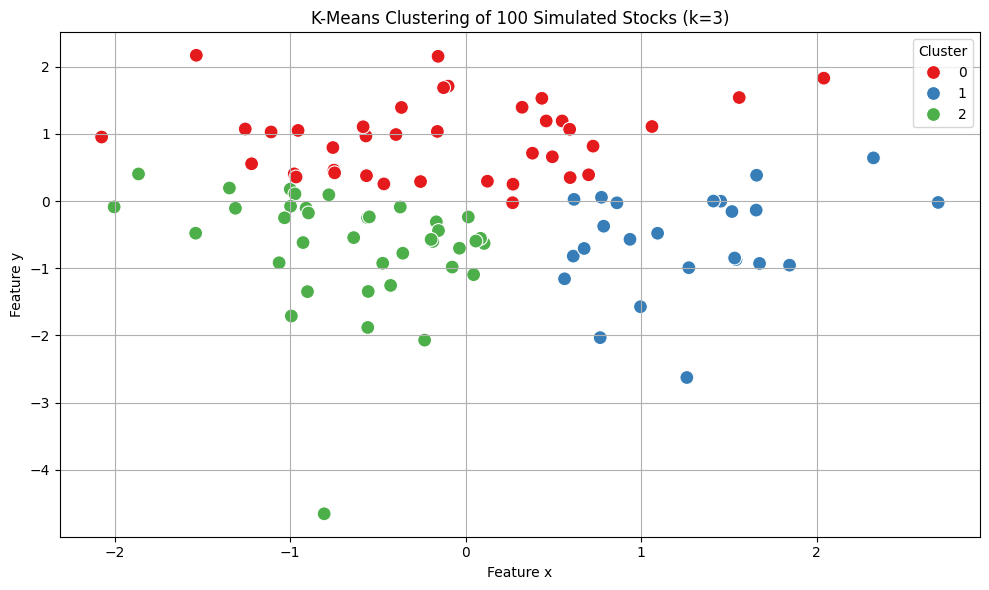

In [ ]:
from sklearn.cluster import KMeans

np.random.seed(48)
# Simulate data for 100 stocks with 2 features: x and y
n_stocks = 100
x = np.random.normal(loc=0, scale=1, size=n_stocks)
y = np.random.normal(loc=0, scale=1, size=n_stocks)

stocks_df = pd.DataFrame({
    'Stock': [f'Stock_{i+1}' for i in range(n_stocks)],
    'x': x,
    'y': y
})
# Apply K-Means clustering with k = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
stocks_df['Cluster'] = kmeans.fit_predict(stocks_df[['x', 'y']])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stocks_df, x='x', y='y', hue='Cluster', palette='Set1', s=100)
plt.title('K-Means Clustering of 100 Simulated Stocks (k=3)')
plt.xlabel('Feature x')
plt.ylabel('Feature y')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()